In [21]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import tree
import graphviz

In [2]:
class TrainingPlot(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('accuracy'))
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.accuracies) + 1), self.accuracies)
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
        plt.show()
        
plot_losses = TrainingPlot()




In [3]:
df = pd.read_csv("/kaggle/input/braille-datasets/braille.csv", sep=';', quotechar='"')
df

,Character,Dot 1,Dot 2,Dot 3,Dot 4,Dot 5,Dot 6
0,A,1,0,0,0,0,0
1,B,1,1,0,0,0,0
2,C,1,0,0,1,0,0
3,D,1,0,0,1,1,0
4,E,1,0,0,0,1,0
5,F,1,1,0,1,0,0
6,G,1,1,0,1,1,0
7,H,1,1,0,0,1,0
8,I,0,1,0,1,0,0
9,J,0,1,0,1,1,0


In [4]:
target = np.eye(df.shape[0])

In [5]:
target[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
X = pd.DataFrame()
X[0] = df["Dot 1"]
X[1] = df["Dot 2"]
X[2] = df["Dot 3"]
X[3] = df["Dot 4"]
X[4] = df["Dot 5"]
X[5] = df["Dot 6"]

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(6, input_shape=(6, ), activation=keras.activations.sigmoid, use_bias=False))
model.add(keras.layers.Dense(48, activation=keras.activations.softmax))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(0.01))


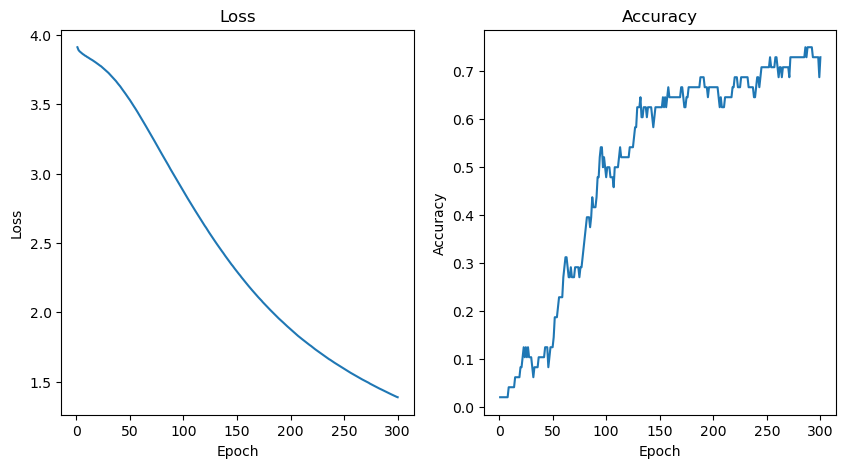

2/2 [==============================] - 1s 537ms/step - loss: 1.3891 - accuracy: 0.7292


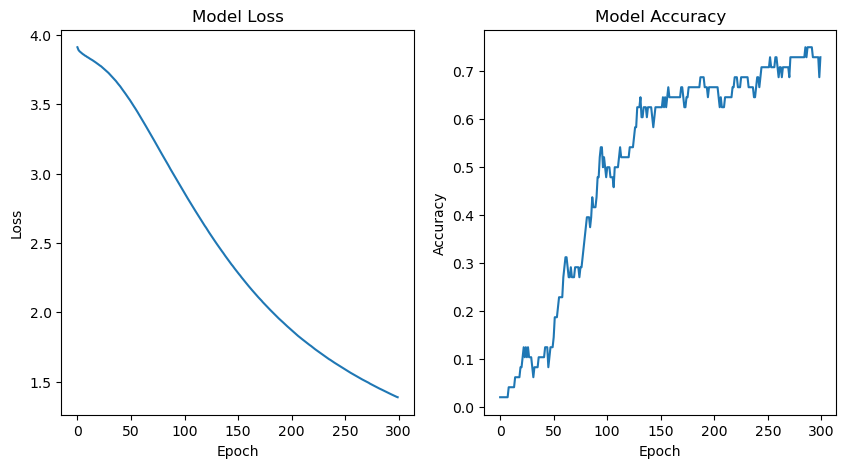

In [8]:
history = model.fit(
    X,
    target,
    epochs=300,
    verbose=1,
    shuffle=True,
    callbacks=[plot_losses]
)

# Plot loss history
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot accuracy history
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [9]:
model.evaluate(X, target)

2/2 [==============================] - 0s 6ms/step - loss: 1.3848 - accuracy: 0.7292


[1.3848401308059692, 0.7291666865348816]

In [10]:
predict_a = model.predict(X[0:1])

1/1 [==============================] - 0s 108ms/step


In [11]:
predict_a.argmax()

14

In [12]:
predict_a[0][predict_a.argmax()]

0.20376833

In [13]:
predict_a[0]

array([1.73980579e-01, 1.23220813e-02, 1.20124901e-02, 1.64158340e-03,
       2.05455627e-02, 2.79434281e-03, 1.02457928e-03, 1.20450659e-02,
       4.53208158e-05, 8.53325910e-05, 1.42473504e-01, 1.30338119e-02,
       2.47563235e-02, 5.15856259e-02, 2.03768328e-01, 2.45655118e-03,
       1.22488271e-02, 2.93077081e-02, 1.40269069e-04, 1.12467882e-04,
       1.00172218e-02, 9.75490781e-04, 9.21015671e-05, 2.21908162e-03,
       5.56804705e-03, 1.07821915e-02, 1.65023625e-01, 1.79688539e-02,
       1.38354311e-02, 1.49140519e-03, 2.00916678e-02, 2.70521408e-03,
       1.30479515e-03, 7.66808912e-03, 4.90342936e-05, 8.94922923e-05,
       6.84918079e-04, 4.87802143e-04, 5.47475007e-04, 1.28247659e-04,
       5.08572964e-04, 9.51244205e-04, 9.93129564e-04, 1.63029581e-02,
       1.88200473e-04, 2.62668380e-03, 2.32978069e-04, 8.56762999e-05],
      dtype=float32)

In [14]:
predict_z = model.predict(X[25:26])

1/1 [==============================] - 0s 21ms/step


In [15]:
predict_z.argmax()

25

In [16]:
predict_z[0][predict_z.argmax()]

0.58062243

In [24]:
model_tree = tree.DecisionTreeClassifier()

In [25]:
model_tree.fit(X, target)

DecisionTreeClassifier()

In [28]:
# Export the decision tree as a Graphviz object
dot_data = tree.export_graphviz(model_tree, out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
#graph.view()
graph.save("tree.pdf")

'tree.pdf'

In [27]:
# Calcular a pontuação de precisão do modelo nos dados de teste
print("score:", model_tree.score(X, target))

score: 0.5
